# **KMeans Algorithm to predict Shelf-Life Clusters**

> Table of Contents :
  * Import libraries
  * Import dataset
  * Exploratory data analysis
  * Declare feature vector and target variable
  * Convert categorical variable into integers
  * Feature scaling
  * K-Means model with two clusters
  * K-Means model parameters study
  * Check quality of weak classification by the model
  * Use elbow method to find optimal number of clusters
  * K-Means model with different clusters
  * Results and conclusion

**Importing all the crucial libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
! git clone https://github.com/vaishakhshetty/STEER-ML.git

Cloning into 'STEER-ML'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 58 (delta 18), reused 45 (delta 11), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [ ]:
ls

sample_data/  STEER-ML/


## Data Preprocessing

In [ ]:
data = pd.read_csv('/content/STEER-ML/data/V5_Dummy-Data.csv')

In [ ]:
data.head(5)

,Unnamed: 0,Device_type,Device_ID,Device_brand,Device_model,Manufacture_Date,Allocation_Date,Assessment_Date,Age(days),device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms)
0,0,Feature Phone,41181218,Nokia,6300,2016-12-05,2021-07-26,2022-01-13,1865,No,No,No,Poor,2.86,Poor
1,1,Laptop,33295510,Lenovo,Ideapad,2019-02-19,2021-05-28,2022-01-08,1054,No,No,Yes,Good,19.10,Good
2,2,Feature Phone,44719050,Nokia,225,2014-03-08,2021-04-16,2022-01-31,2886,No,Yes,No,Poor,4.34,Poor
3,3,Feature Phone,75689223,Samsung,6300,2014-12-01,2021-05-20,2022-01-03,2590,No,No,Yes,Poor,4.60,Poor
4,4,Laptop,38511752,Apple,MacBook,2015-12-06,2021-05-26,2022-01-23,2240,No,No,No,Average,6.89,Average


In [ ]:
data = data.drop(['Unnamed: 0','Device_ID'], axis = 1)
data.head()

,Device_type,Device_brand,Device_model,Manufacture_Date,Allocation_Date,Assessment_Date,Age(days),device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms)
0,Feature Phone,Nokia,6300,2016-12-05,2021-07-26,2022-01-13,1865,No,No,No,Poor,2.86,Poor
1,Laptop,Lenovo,Ideapad,2019-02-19,2021-05-28,2022-01-08,1054,No,No,Yes,Good,19.10,Good
2,Feature Phone,Nokia,225,2014-03-08,2021-04-16,2022-01-31,2886,No,Yes,No,Poor,4.34,Poor
3,Feature Phone,Samsung,6300,2014-12-01,2021-05-20,2022-01-03,2590,No,No,Yes,Poor,4.60,Poor
4,Laptop,Apple,MacBook,2015-12-06,2021-05-26,2022-01-23,2240,No,No,No,Average,6.89,Average


In [ ]:
# join two attribute columns - Device Brand and Device Model >
data['Device_list'] = data[['Device_brand', 'Device_model']].values.tolist()
data['Device'] = data['Device_list'].apply(' '.join)

In [ ]:
data = data.drop(['Device_list', 'Device_brand', 'Device_model'], axis = 1)
data.head(5)

,Device_type,Manufacture_Date,Allocation_Date,Assessment_Date,Age(days),device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms),Device
0,Feature Phone,2016-12-05,2021-07-26,2022-01-13,1865,No,No,No,Poor,2.86,Poor,Nokia 6300
1,Laptop,2019-02-19,2021-05-28,2022-01-08,1054,No,No,Yes,Good,19.10,Good,Lenovo Ideapad
2,Feature Phone,2014-03-08,2021-04-16,2022-01-31,2886,No,Yes,No,Poor,4.34,Poor,Nokia 225
3,Feature Phone,2014-12-01,2021-05-20,2022-01-03,2590,No,No,Yes,Poor,4.60,Poor,Samsung 6300
4,Laptop,2015-12-06,2021-05-26,2022-01-23,2240,No,No,No,Average,6.89,Average,Apple MacBook


In [ ]:
data.head()

,Device_type,Manufacture_Date,Allocation_Date,Assessment_Date,Age(days),device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms),Device
0,Feature Phone,2016-12-05,2021-07-26,2022-01-13,1865,No,No,No,Poor,2.86,Poor,Nokia 6300
1,Laptop,2019-02-19,2021-05-28,2022-01-08,1054,No,No,Yes,Good,19.10,Good,Lenovo Ideapad
2,Feature Phone,2014-03-08,2021-04-16,2022-01-31,2886,No,Yes,No,Poor,4.34,Poor,Nokia 225
3,Feature Phone,2014-12-01,2021-05-20,2022-01-03,2590,No,No,Yes,Poor,4.60,Poor,Samsung 6300
4,Laptop,2015-12-06,2021-05-26,2022-01-23,2240,No,No,No,Average,6.89,Average,Apple MacBook


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Device_type        10000 non-null  object 
 1   Manufacture_Date   10000 non-null  object 
 2   Allocation_Date    10000 non-null  object 
 3   Assessment_Date    10000 non-null  object 
 4   Age(days)          10000 non-null  int64  
 5   device_in_use      10000 non-null  object 
 6   water_damage       10000 non-null  object 
 7   device_responsive  10000 non-null  object 
 8   battery_health     10000 non-null  object 
 9   Usage(hrs)         10000 non-null  float64
 10  Latency(ms)        10000 non-null  object 
 11  Device             10000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 937.6+ KB


In [ ]:
# Adding a checkpoint 
data_copy = data.copy()

In [ ]:
data.describe()

,Age(days),Usage(hrs)
count,10000.000000,10000.000000
mean,1675.592300,9.155735
std,738.348123,5.579739
min,371.000000,1.000000
25%,1030.750000,3.990000
50%,1693.000000,8.480000
75%,2306.000000,13.930000
max,2973.000000,19.990000


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

,Device_type,Manufacture_Date,Allocation_Date,Assessment_Date,Age(days),device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms),Device
0,0,1051,206,12,1461,0,0,0,2,168,2,34
1,1,1837,147,7,665,0,0,1,1,1447,1,28
2,0,66,105,30,2465,0,1,0,2,298,2,32
3,0,332,139,2,2175,0,0,1,2,324,2,64
4,1,691,145,22,1831,0,0,0,0,444,0,13


In [ ]:
data = data.drop(['Manufacture_Date', 'Allocation_Date', 'Assessment_Date'], axis = 1)
data.head(2)

,Device_type,Age(days),device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms),Device
0,0,1461,0,0,0,2,168,2,34
1,1,665,0,0,1,1,1447,1,28


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Device_type        10000 non-null  int64
 1   Age(days)          10000 non-null  int64
 2   device_in_use      10000 non-null  int64
 3   water_damage       10000 non-null  int64
 4   device_responsive  10000 non-null  int64
 5   battery_health     10000 non-null  int64
 6   Usage(hrs)         10000 non-null  int64
 7   Latency(ms)        10000 non-null  int64
 8   Device             10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


**Feature Scaling**

In [ ]:
cols = data.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(data)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head(10)

,Device_type,Age(days),device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms),Device
0,0.0,0.574970,0.0,0.0,0.0,1.0,0.109518,1.0,0.485714
1,0.5,0.261708,0.0,0.0,1.0,0.5,0.943286,0.5,0.400000
2,0.0,0.970091,0.0,1.0,0.0,1.0,0.194263,1.0,0.457143
3,0.0,0.855962,0.0,0.0,1.0,1.0,0.211213,1.0,0.914286
4,0.5,0.720582,0.0,0.0,0.0,0.0,0.289439,0.0,0.185714
5,0.0,0.155451,0.0,0.0,1.0,1.0,0.038462,1.0,0.471429
6,0.0,0.556474,1.0,1.0,1.0,1.0,0.095176,1.0,0.471429
7,0.0,0.290437,0.0,0.0,1.0,0.0,0.353325,0.0,0.857143
8,1.0,0.285321,1.0,0.0,1.0,0.0,0.368318,0.0,0.514286
9,1.0,0.680047,0.0,0.0,0.0,0.0,0.323338,0.0,0.300000


# Modelling 
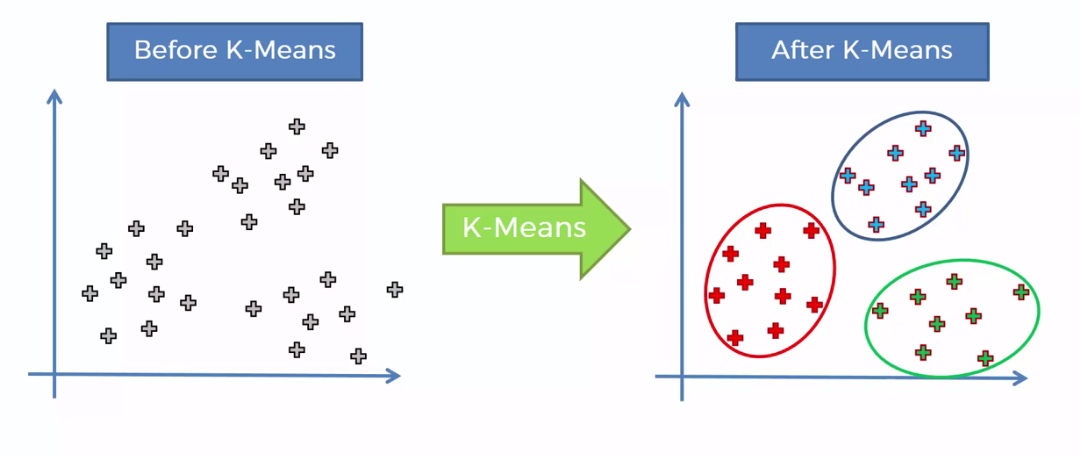


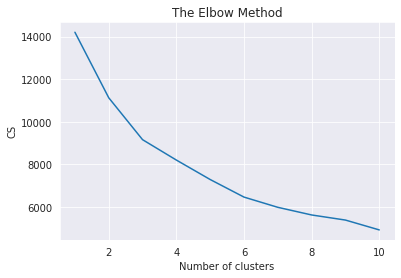

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
clusters = kmeans.fit_predict(X)
clusters

array([2, 0, 2, ..., 1, 2, 1], dtype=int32)

In [ ]:
X.insert(0, "Cluster", clusters, True)

In [ ]:
X = data_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(clusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([X, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head(10)

,Device_type,Manufacture_Date,Allocation_Date,Assessment_Date,Age(days),device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms),Device,cluster_predicted
0,Feature Phone,2016-12-05,2021-07-26,2022-01-13,1865,No,No,No,Poor,2.86,Poor,Nokia 6300,2
1,Laptop,2019-02-19,2021-05-28,2022-01-08,1054,No,No,Yes,Good,19.10,Good,Lenovo Ideapad,0
2,Feature Phone,2014-03-08,2021-04-16,2022-01-31,2886,No,Yes,No,Poor,4.34,Poor,Nokia 225,2
3,Feature Phone,2014-12-01,2021-05-20,2022-01-03,2590,No,No,Yes,Poor,4.60,Poor,Samsung 6300,2
4,Laptop,2015-12-06,2021-05-26,2022-01-23,2240,No,No,No,Average,6.89,Average,Apple MacBook,1
5,Feature Phone,2019-12-24,2021-02-26,2022-02-12,781,No,No,Yes,Poor,1.68,Poor,Nokia 5310,2
6,Feature Phone,2017-02-05,2021-07-09,2022-01-28,1818,Yes,Yes,Yes,Poor,2.64,Poor,Nokia 5310,2
7,Feature Phone,2018-12-06,2021-07-11,2022-01-07,1128,No,No,Yes,Average,7.96,Average,Samsung 125,0
8,Smart Phone,2019-01-23,2021-01-06,2022-02-11,1115,Yes,No,Yes,Average,8.28,Average,Nokia C20 Plus,0
9,Smart Phone,2016-04-02,2021-06-08,2022-02-07,2137,No,No,No,Average,7.50,Average,Blackberry Q5,1


In [ ]:
all_features = combinedDf[['device_in_use', 'water_damage', 'device_responsive', 
                           'battery_health', 'Latency(ms)']]

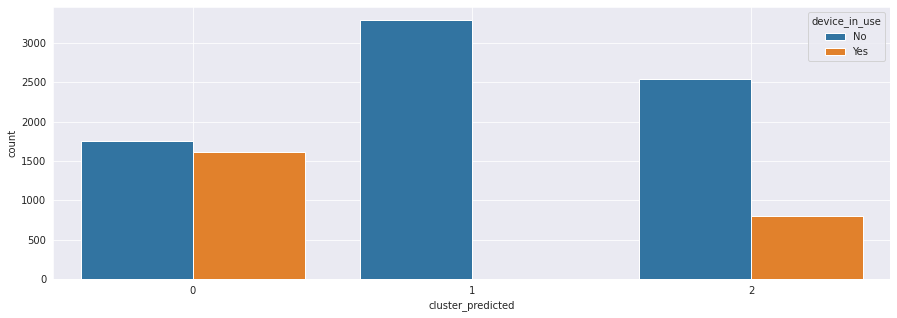

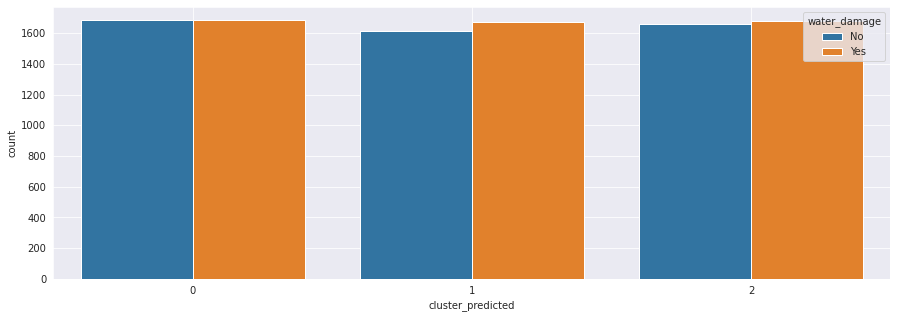

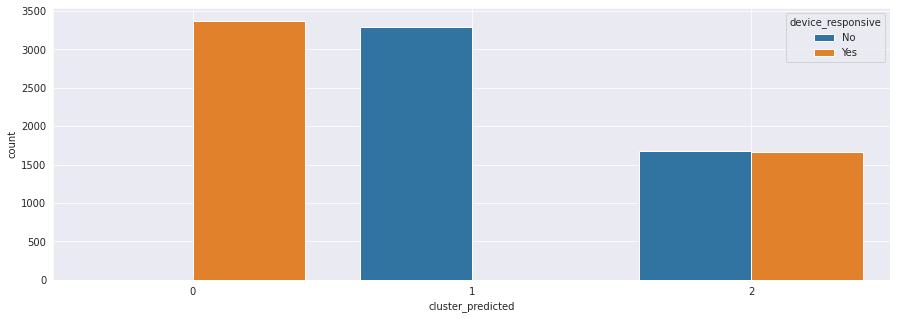

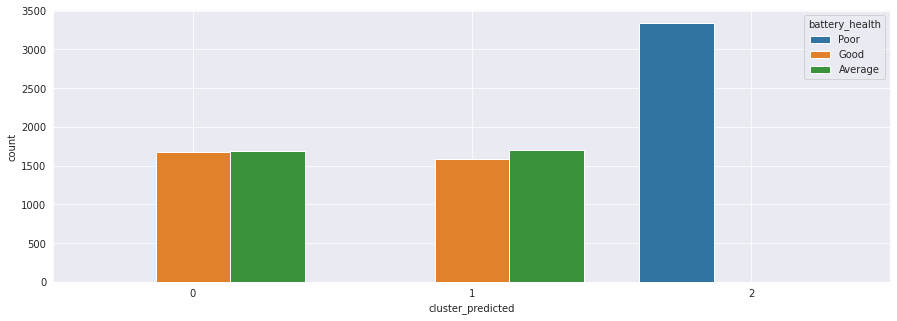

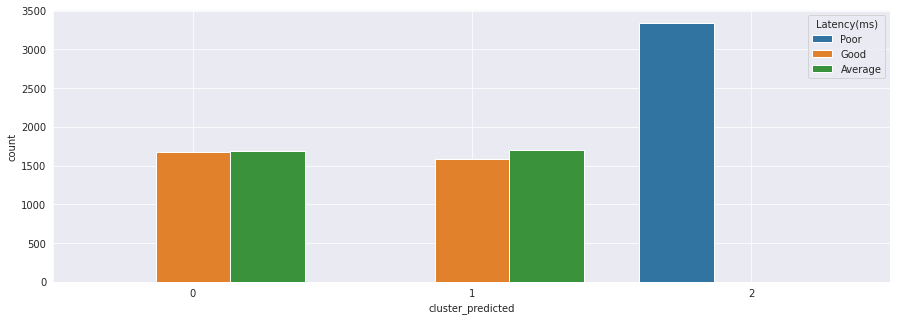

In [ ]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='cluster_predicted',hue=col, data = combinedDf)
    plt.grid(True)
    plt.show()

In [ ]:
#end